# Проект по исследованию рынка заведений общественного питания в Москве

В этом проекте мы будем изучать и исследовать датасет с информацией самой разной по заведениям общепита в Москве. Будем это все проделывать в несколько этапов с выводами, и в конце с презентацией для инвесторов.

Работать по ходу проекта будем с одним датасетом - rest_data,  содержащим столбцы:

id — идентификатор объекта;
object_name — название объекта общественного питания;
chain — сетевой ресторан;
object_type — тип объекта общественного питания;
address — адрес;
number — количество посадочных мест.

## Предобработка данных и их просмотр

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import re

rest_data = pd.read_csv('rest_data.csv')


Перво наперво - добавим все необходимые библиотеки и прочитаем данные, а после и просмотрим.

In [3]:
print(display(rest_data))
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

rest_data.info()
rest_data.isna().sum()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

И так, что можно пока сказать точно. Формат и тип данных в порядке, пропусков не видно так же. Осталось проверить на аномальные или неправильные значения, а так же на дубликаты в столбцах или строках.

In [4]:
 rest_data.duplicated().sum()

0

In [5]:
#rest_data['chain'].value_counts()
#rest_data['object_type'].value_counts()

Итого. Данные чисты по базовым проверкам. Осталось убрать синонимы названий одних и тех же, хотя бы по нескольким фирмам. И  для красоты опустим еще строки в столбцах с названиями до нижнего регистра. 

In [6]:
synonyms = {'mcdonalds' : ('МАКДОНАЛДС', 'Ресторан "Макдоналдс"','Макдоналдс'), 'kfc' : ('Ресторан "KFC"', 'КФЦ')}
def check_syn(cell):
    for name, syn in synonyms.items():
        if cell in syn: return name
    return cell
rest_data['object_name_new'] = rest_data['object_name'].apply(check_syn)     

In [7]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_name_new'] = rest_data['object_name_new'].str.lower()

Готово, можно приступать непосредственно к  аналитической части.

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

В этом разделе мы уже начнем изучать, и углубляться в рынок общественного питания. Проанализируем различные показатели и взаимосвязи. Как раз с этого и начнем.

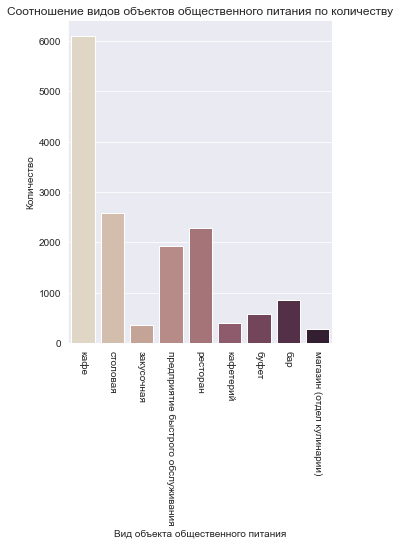

In [8]:
sns.set_palette('muted')
sns.set_style('darkgrid')
sns.catplot(x='object_type', kind='count', palette='ch:.27', data=rest_data)
plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество')
plt.xticks(rotation=-90)
plt.show()

И так, как видим, по видам общепита в лидерах кафе различные с очень большим отрывом, далее с отставанием столовые и рестораны на 2 и 3 местах соответственно. Лидерсвто кафе заведений, предположу, связано с немколькими факторами, главные из которых - значительно меньше затрат на содержание(по сравнению с практически любым другим видом, кроме некоторых менее популярных) и вероятно из за удобства для жителей города. В больших города жизнь буквально кипит, и у людей нет лишнего времени, поэтому кафе, где обслужат наверняка быстро - так популярны.

### Cоотношение сетевых и несетевых заведений по количеству

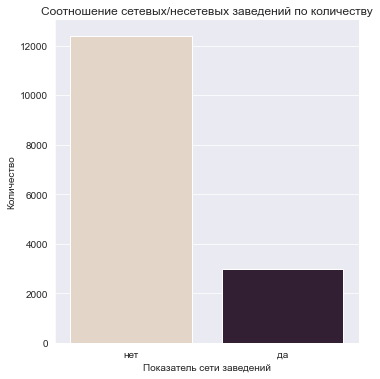

In [9]:
sns.catplot(x='chain', kind='count', palette='ch:.2', data=rest_data)
plt.title('Cоотношение сетевых/несетевых заведений по количеству')
plt.xlabel('Показатель сети заведений')
plt.ylabel('Количество')
plt.show()

Что касается сетевых и не сетевых заведений, тот тут снова тотальный перевес в одну из сторон - в сторону не сетевых. Тут перевес вероятнее всего связан с большим количеством открытых кафешек в Москве местных.

### Для кого характерно сетевое распространение?

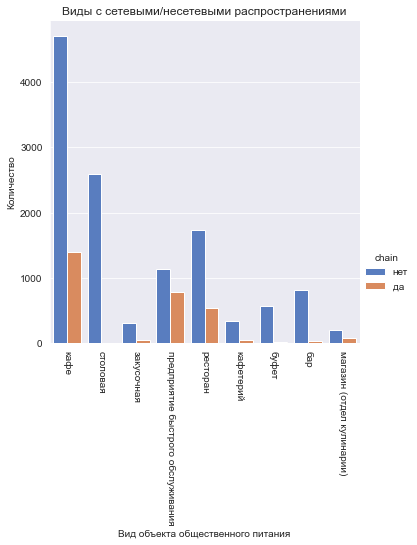

In [10]:
sns.catplot(x='object_type', hue='chain',  kind='count', data=rest_data)
plt.title('Виды с сетевыми/несетевыми распространениями')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество')
plt.xticks(rotation=-90)
plt.show()

Как видим, сетевое распространение наиболее характерно для кафе. Дальше недалеко отошли и предпреятия общественного питания с ресторанами, что вополне логично. Что любопытно, то у столовых и буфетов практически нет сетевых заведений, практически 100% частные. Я думаю это связано с локальностью этих заведений и, вероятно, принадлежности в госпредприятиям. Ведь где мы чаще всего встречаем столовые и буфеты? Школы, театры, музыеи, заводы, предприятия. И вероятно иметь сеть таких заведений просто не выгодно.

### А что характерно для сетевых заведений?

In [11]:
rest_data.pivot_table(index='object_type', columns='chain', values='number', aggfunc=({'count', 'mean'}))


count                mean            
chain                                  да     нет          да         нет
object_type                                                              
бар                                  37.0   819.0   53.027027   43.063492
буфет                                11.0   574.0   12.727273   51.865854
закусочная                           56.0   304.0   14.375000    6.361842
кафе                               1396.0  4703.0   47.426934   37.427174
кафетерий                            52.0   346.0   12.269231    8.650289
магазин (отдел кулинарии)            78.0   195.0    8.679487    4.353846
предприятие быстрого обслуживания   791.0  1132.0   40.166877    6.846290
ресторан                            544.0  1741.0  100.233456   95.771970
столовая                              3.0  2584.0  112.333333  130.267415

Интересно. Выходит, что по сетевым заведениям практически любого вида объекта общественного питания характерна "парадигма" - мало заведений с большим количеством посадочных мест. Взять хотя бы те же кафе. В сетевых кафе в среднем порядка 50 посадочных мест против 40 у несетевых, в то время как по количеству заведений, несетевых в 3.5 раза больше.

### Среднее количество мест в различных видах общепита

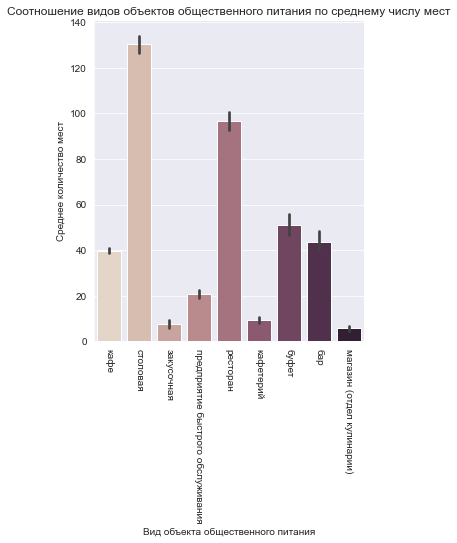

object_type
бар                                   43.0
буфет                                 51.0
закусочная                             8.0
кафе                                  40.0
кафетерий                              9.0
магазин (отдел кулинарии)              6.0
предприятие быстрого обслуживания     21.0
ресторан                              97.0
столовая                             130.0
Name: number, dtype: float64

In [12]:
sns.catplot(x='object_type', y='number', kind='bar', palette='ch:.2', data=rest_data)
plt.title('Cоотношение видов объектов общественного питания по среднему числу мест')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Среднее количество мест')
plt.xticks(rotation=-90)
plt.show()
rest_data.groupby('object_type')['number'].mean().round()

Начием углубляться, и видим показатели среднего числа посадочных мест в различных видах общепита. Три первых места здесь распределились примерно ожидаемо, столовая - 130 мест, далее рестораны с практически сотней мест(97), и буфеты - 51. И давайте попробуем интерпретировать эти распределения. Как я вижу, то здесь все до ужаса просто. Столовые направлены на то чтобы в определенные часы дня собрать в себе как можно больше народу, чтобы все смогли поеть(чаще всего), иначе бы предприятия, или другие места где обеды нормированы по часам теряли бы деньги из за неэффективного таймменеджмента. Поэтому здесь и наблюдается большое количество средних мест. 

Далее рестораны. Здесь тоже все достаточно просто. Заведения как правило частные, не для всех слоев населения, и каждое которое пытается выделиться эксклюзивностью. Они направлены на удержание клиента за счет атмосферы, качественного обслуживания и вкусной еды. Поэтому им выгодно иметь много посадочных мест. 

Ну а после этих двух лидеров идут уже заведения которые наоборот, направлены по большей части на быстрое обслуживание, в разной степени и немного разных условиях, но все же.

### Топ улиц и районов

In [13]:
street_types = ['улица', 'ул', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека', 'село']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(street_types))
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)
rest_data.head()

,id,object_name,chain,object_type,address,number,object_name_new,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе «академия»,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе «вишневая метель»,Абрамцевская улица


Теперь для дальнейшей работы выделим в отдельный столбец улицы(это не идеально, но сильных погрешностей нет кажется)

In [14]:
from io import BytesIO
import requests
spreadsheet_id = '1sguZSB8CeYCbCK2eMmsAlMkz9mBFw11GlyImzqJpjes'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
column_names=['streetname','areaid','okrug', 'area']
data_inner = pd.read_csv(BytesIO(r.content), header=None, names=column_names)
data_inner

,streetname,areaid,okrug,area
0,street,areaid,okrug,area
1,1-й Автозаводский проезд,98,ЮАО,Даниловский район
2,1-й Амбулаторный проезд,54,САО,Район Аэропорт
3,1-й Архивный переулок,20,ЦАО,Район Хамовники
4,1-й Бабьегородский переулок,21,ЦАО,Район Якиманка
...,...,...,...,...
4394,Яузская улица,18,ЦАО,Таганский район
4395,Яузский бульвар,18,ЦАО,Таганский район
4396,Яхромская улица,60,САО,Дмитровский район
4397,Яхромский проезд,58,САО,Район Восточное Дегунино


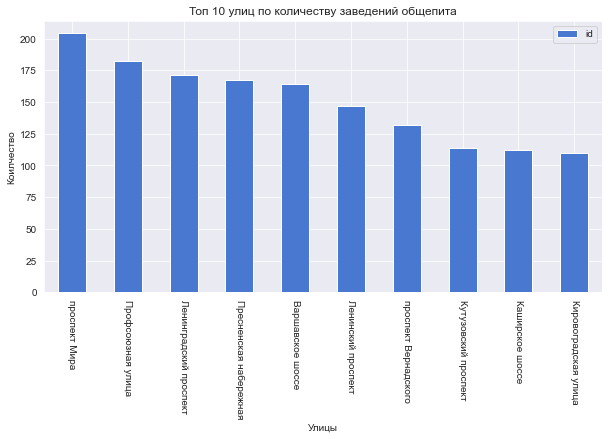

In [16]:
rest_data.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(10).plot(kind='bar',grid=True, figsize=(10, 5), title='Топ 10 улиц по количеству заведений общепита')
plt.xlabel('Улицы')
plt.ylabel('Коилчество')
plt.xticks(rotation=-90)
plt.show()

Что же можно здесь сказать. Как мы видим, то эти топ 10 самых "населенных" улиц на заведения составляют 4 проспекта и 2 шоссе. Тоесть большинсвто это длинные, обширные участки Московских дорог где часто проезжает очень большое количество машин и проходит много людей(на этих улицах так же сконцентрировано много станций метро). Вывод здесь простой - где большая проходимость, там и много заведений.

In [17]:
street_data = rest_data.groupby(['street'])['id'].count().reset_index()
msk_data = data_inner.merge(street_data, left_on='streetname', right_on='street')
most_data = msk_data.sort_values(by='id', ascending=False).head(48)
most_data['area'].value_counts()


Район Тропарево-Никулино           2
Район Чертаново Северное           2
Донской район                      2
Район Проспект Вернадского         2
Обручевский район                  2
Район Чертаново Южное              2
Ломоносовский район                2
Район Нагатино-Садовники           2
Район Гагаринский                  2
Район Чертаново Центральное        2
Район Теплый Стан                  2
Останкинский район                 1
Район Ростокино                    1
Нагорный район                     1
Район Сокол                        1
Хорошевский район                  1
Академический район                1
Район Орехово-Борисово Южное       1
Район Марьина роща                 1
Район Москворечье-Сабурово         1
Ярославский Район                  1
Район Ясенево                      1
Район Якиманка                     1
Район Северное Бутово              1
Район Южное Бутово                 1
Район Беговой                      1
Район Свиблово                     1
Р

На этом этапе мы уже разбираемся подробнее с улицами которые выделяются больше всего по количеству заведений общепита на них, и из справочника еще и посмотрим в каких районах они "обитают". И как видно, в основном большая доля улиц расположилась примерно в югах, в северных районах и центре намного меньше заведений.

In [18]:
print(msk_data[msk_data['id'] == 1]['streetname'].nunique(), 'улиц с одним единственным объектом общемтвенного питания')

517 улиц с одним единственным объектом общемтвенного питания


In [19]:
msk_data.query('id == 1')['okrug'].value_counts()

ЦАО           186
ВАО            67
СВАО           66
САО            55
ЮВАО           55
ЗАО            45
ЮАО            29
ЮЗАО           28
СЗАО           27
Зеленоград      6
Name: okrug, dtype: int64

А вот и как улицы с одним объектом общепита распределены по округам. Улиц хоть и больше чем у топов по количеству, все еще видно что закономерность в предыдущем расчете соблюдается - в центре и севере Москвы(прибавился и восток) на улицу приходится меньше заведений чем на юге. Как мне кажется, это по большей части связано с тем, что в центре в особенности, где много исторических мест тяжело найти место для какого то заведения общепита. А в центре очень много маленьких улочек, и вероятно такое большое количество одиноких заведений(не только в центре) связано: с длиной улицы, с близостью от промзон или спальных районов, в особенности в новых(построенных позже 2000-х), с малой проходимостью улиц, или неоживленностью их, если хотите. И навернка есть еще уйма других мелких факторов которые бы объяснили данный феномен. 

### Распределение мест 

C:\Users\djspa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


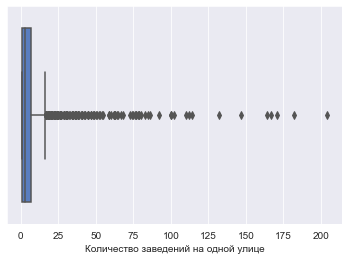

In [22]:
street_data
sns.boxplot(street_data['id'])
plt.xlabel('Количество заведений на одной улице')
plt.show()

И под конец нужно глянуть как распределены места на улицах с большим количеством большим количеством объектов общественного питания. Определим для начала что считать за большое количество заведений, и это число приблизительно 5.

In [23]:
result = rest_data.merge(street_data, on='street')
result = result.rename(columns = {'id_y' : 'number_of_places'})
result_sort = result.query('number_of_places > 5').sort_values(by='number_of_places', ascending=False)

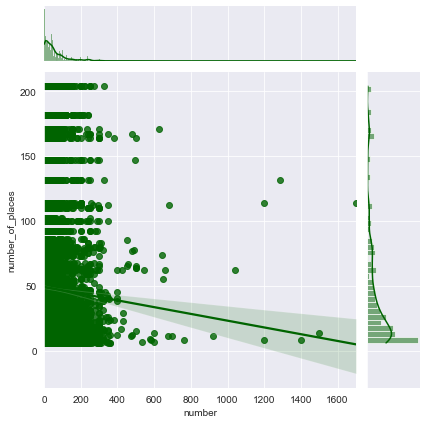

In [24]:
sns.jointplot(x='number', y='number_of_places', data=result_sort, kind='reg', color='darkgreen') 
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений на одну улицу')
plt.show()

Вот и распределение, показывающее как количество посадочных мест для улиц с большим количеством объектов общественного питания влияют друг на друга, и как мы видим, здесь наблюдается отрицательная линейная корреляция, что говорит о том, что эти два показателя скорее не зависят, чем наоборот, друг от друга.

## Вывод

Дабы подытожить все вышеизложенные мысли пробежимся сначала по порядку.

Мы взяли данные о заведениях Москвы, проверили их на дубликаты и ошибки, подкорректировали типы и формат данных. 

В непосредственном анализе шли по порядку. Первое - кафе, столовая, ресторан самые популярные виды заведений общепита.
Второе - в Москве наблюдается склонность к несетевым заведениям, в особенности в центре, и в особенности для столовых и кафе(хоть и по сетевым кафе больше всех так же). Третье - по посадочным местам есть интересная закономерность, что в сетевых заведениях их делают больше, по сравнению с несетевыми. И так же что самое большое распространение мест по видам у столовых, ресторанов и буфетов, что вполне логично. 
И наконец четвертое - улицы и районы так же немаловажный показатель. Здесь несколько ньюансов. В центре очень большое количество маленьких и несетевых заведений, что можно обосновать вероятно туристами и эксклюзивностью. На юге Москвы самое большое количество улиц, на которых и заведений много. Номер один по этому показателю - Проспект Мира.

Как мне видится эта картина, то удачное решение - кафе, по трем немаловажным пунктам - большая популярность несетевых кафе в Москве(по количеству самих кафе их больше всех), Однако вероятно не выйдет очень много посадочных мест для людей. И так же около центра и немного южнее много оживленных и наполненых улиц для такого рода заведения.

Однако если глянуть немного с другой стороны, ресторан будет, так же, неплохой идеей. Немного уступая в показателях их количества в Москве, они выигрывают по количеству мест, что может сыграть важную роль. 

Презентация: https://disk.yandex.ru/i/wkquFaAJ7Rq5SA